## Simple linear regression

In [2]:
!mamba install pandas
!mamba install seaborn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.043199999988079 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        3.0.0                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   
mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn
Channels: emscripten-forge, conda-forge

Solving environm

In [3]:
# Import packages
import pandas as pd
import seaborn as sns

In [4]:
# load the sns dataset and call it "penguins"
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


From the first 5 rows of dataset, we observe there are several columns species,	island,	bill_length_mm,	bill_depth_mm	,flipper_length_mm,	body_mass_g,	sex. There are also some mikssing data.

**Data cleaning**
For the purposes of this course, we are focusing our analysis on Adelie and Gentoo penguins, and will be dropping any missing values from the dataset. 

In [22]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sample = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sample.dropna()
penguins_final.reset_index(inplace = True, drop = True)


In short, the dropna() function by default removes any rows with any missing values in any of the columns. The reset_index() function resets the index values for the rows in the dataframe. Typically, you use reset_index() after you've finished manipulating the dataset. By setting inplace=True, you will not create a new DataFrame object. By setting drop=True, you will not insert a new index column into the DataFrame object.

**Exploratory data analysis**
Since this part of the course focuses on simple linear regression, you want to check for any linear relationships among variables in the dataframe. You can do this by creating scatterplots using any data visualization package, for example matplotlib.plt, seaborn, or plotly.

To visualize more than one relationship at the same time, we use the pairplot() function from the seaborn package to create a scatterplot matrix.

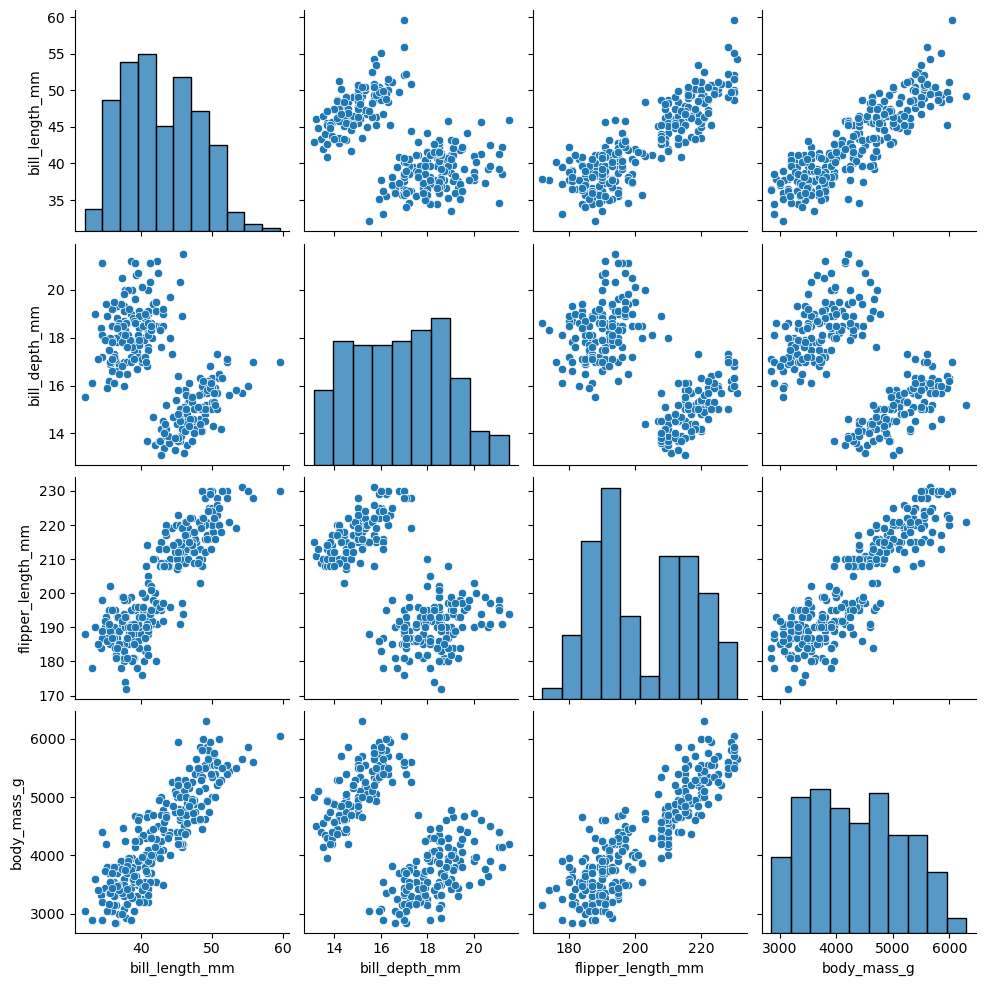

In [23]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

From the scatterplot matrix, you can observe a few linear relationships:

bill length (mm) and flipper length (mm)
bill length (mm) and body mass (g)
flipper length (mm) and body mass (g)

**Model construction**
Based on the above scatterplots, you could probably run a simple linear regression on any of the three relationships identified. For this part of the course, you will focus on the relationship between bill length (mm) and body mass (g).

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets [[]], and listing the names of the columns of interest.

In [24]:
# Subset Data
ols_data = penguins_final[['bill_length_mm', 'body_mass_g']]
ols_data.head()

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,36.7,3450.0
4,39.3,3650.0


Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the ~, and the x or independent variables comes after the ~.

In [25]:
# ols formula
ols_formula = 'body_mass_g ~ bill_length_mm'

In [26]:
# Import ols function
from statsmodels.formula.api import ols

Then, you can plug in the ols_formula and ols_data as arguments in the ols() function. After you save the results as a variable, you can call on the fit() function to actually fit the model to the data.

In [43]:
# Build OLS, fit model to data
ols_model_data = ols(formula = ols_formula, data= ols_data)
model = ols_model_data.fit()

In [28]:
'''call the summary() function on the model object to get the 
coefficients and more statistics about the model. 
The output from model.summary() can be used to evaluate the model and interpret the results.'''
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           1.33e-85
Time:                        12:49:44   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can use the regplot() function from seaborn to visualize the regression line.

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

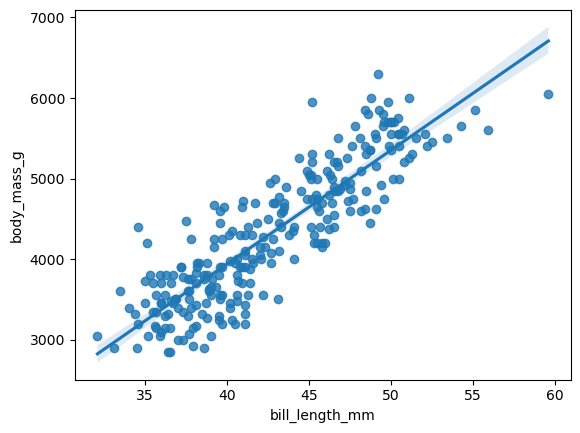

In [29]:
sns.regplot(x = 'bill_length_mm', y = 'body_mass_g', data = ols_data)

**Finish checking model assumptions**
As you learned in previous videos, there are four main model assumptions for simple linear regression, in no particular order:

Linearity
Normality
Independent observations
Homoscedasticity
You already checked the linearity assumption by creating the scatterplot matrix. The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. So we can check off assumptions 1 and 3.

The normality and homoscedasticity assumptions focus on the distribution of errors. Thus, you can only check these assumptions after you have constructed the model. To check these assumptions, you will check the residuals, as an approximation of the errors.

To more easily check the model assumptions and create relevant visualizations, you can first subset the X variable by isolating just the bill_length_mm column. Additionally, you can save the predicted values from the model using the model.predict(X) function.

In [30]:
# subset the data
ols_data_bill_length = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(ols_data_bill_length)

In [31]:
# Calculate residuals
residuals  = model.resid

**Check the normality assumption**
To check the normality assumption, you can create a histogram of the residuals using the histplot() function from the seaborn package.

From the below histogram, you may notice that the residuals are almost normally distributed. In this case, it is likely close enough that the assumption is met.

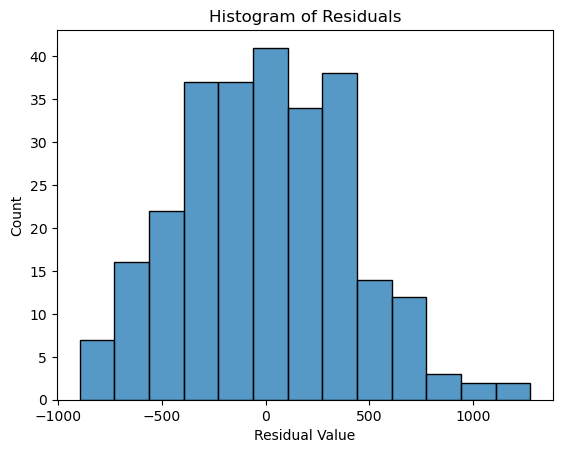

In [34]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals )
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Another way to check the normality function is to create a quantile-quantile or Q-Q plot. Recall that if the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. You can create a Q-Q plot by using the qqplot function from the statsmodels.api package.

The Q-Q plot shows a similar pattern to the histogram, where the residuals are mostly normally distributed, except at the ends of the distribution.

In [35]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

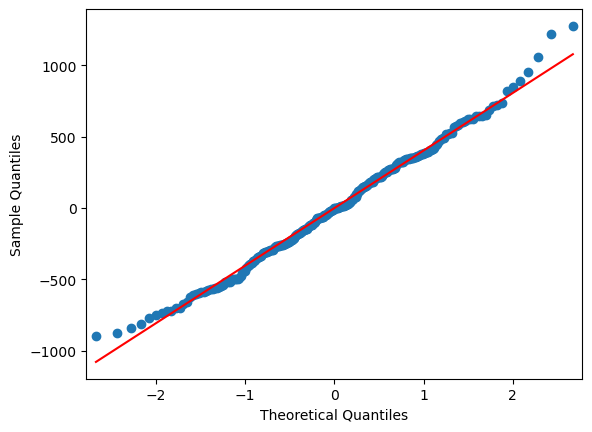

In [38]:
fig = sm.qqplot(residuals,line = 's')
plt.show()

**Check the homoscedasticity assumption**
Lastly, we have to check the homoscedasticity assumption. To check the homoscedasticity assumption, you can create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

You can create one scatterplot by using the scatterplot() function from the seaborn package. The first argument is the variable that goes on the x-axis. The second argument is the variable that goes on the y-axis.

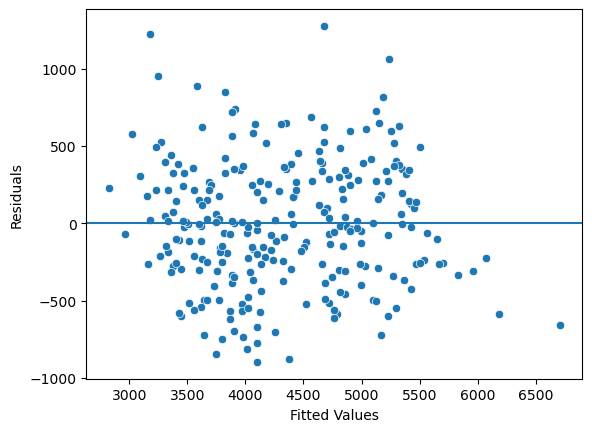

In [42]:
fig = sns.scatterplot(x = fitted_values,  y = residuals)
# Add reference line at residuals = 0
fig.axhline(0)
# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
# Show the plot
plt.show()

## Run simple linear regression

**Introduction**
As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions.

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales.

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [44]:
# Load the dataset into a DataFrame and save in a variable
df = pd.read_csv("marketing_sales_data.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


**Question 1: What do you observe about the different variables included in the data?**
The data includes the following information:
TV promotion budget (expressed as "Low", "Medium", or "High")
Radio promotion budget
Social media promotion budget
Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
Sales accrued from the promotion

In [45]:
# Display number of rows, number of columns
df.shape

(572, 5)

**Question 2: What do you observe about the number of rows and number of columns in the data?**
There are 572 rows and 5 columns in the data. One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

In [46]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
df.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [51]:
# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row

df.isna().any(axis=1).sum()

np.int64(3)

**Question 3: What do you observe about the number of rows containing missing values?**
There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

In [52]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result

df = df.dropna(axis=0)

In [53]:
df.isna().any(axis=1).sum()

np.int64(0)

**Check model assumptions.**
You would like to explore the relationship between radio promotion budget and sales. You could model the relationship using linear regression. To do this, you want to check if the model assumptions for linear regression can be made in this context. Some of the assumptions can be addressed before the model is built --- you will address those in this section. After the model is built, you can finish checking the assumptions.

**Start by creating a plot of pairwise relationships in the data.**
This will help you visualize the relationships between variables in the data and help you check model assumptions.

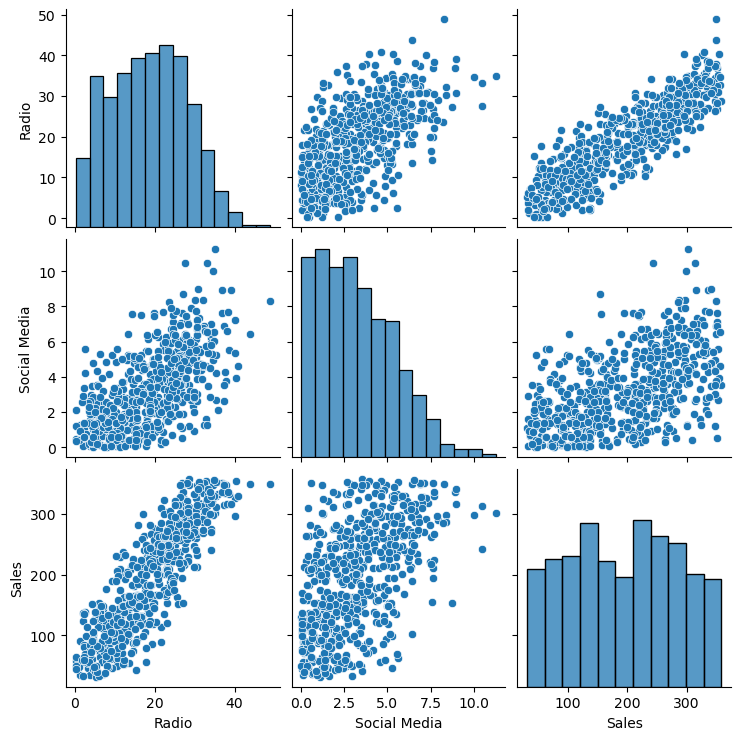

In [55]:
# Create plot of pairwise relationships
sns.pairplot(df)

**Question 4: Is the assumption of linearity met?**
Yes, scatter plot of Sales over Radio, has a positive correlation between 2 variables

**Model Building**

In [56]:
# Select relevant columns
ols_data = df[["Radio", "Sales"]]

In [57]:
ols_data.head()

,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328


**Write the linear regression formula for modeling the relationship between the two variables of interest.**

In [58]:
ols_formula = 'Sales ~ Radio'

In [59]:
#Implement the Ordinary Least Squares (OLS) approach for linear regression.
OLS = ols(formula = ols_formula , data= ols_data)

In [60]:
#Create a linear regression model for the data and fit the model to the data.
model = OLS.fit()

**Results and Evaluation
Get a summary of the results from the model.**

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Wed, 11 Feb 2026   Prob (F-statistic):          2.07e-176
Time:                        14:17:21   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Analyze the bottom table from the results summary.
Based on that table, identify the coefficients that the model determined would generate the line of best fit, the coefficients here being the y-intercept and the slope.**

**Question 5: What is the y-intercept?**
The y-intercept is 41.5326.
**Question 6: What is the slope?**
The slope is 8.1733.

**Question 7: What is the linear equation you would write to express the relationship between sales and radio promotion budget in the form of y = slope * x + y-intercept?**
sales  = 8.1733 *  radio promotion budget + 41.5326

**Question 8: What do you think the slope in this context means?**
If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.

**Finish checking model assumptions.**
Now that you've built the linear regression model and fit it to the data, you can finish checking the model assumptions. This will help confirm your findings.

**Plot the OLS data with the best fit regression line.**

<Axes: xlabel='Radio', ylabel='Sales'>

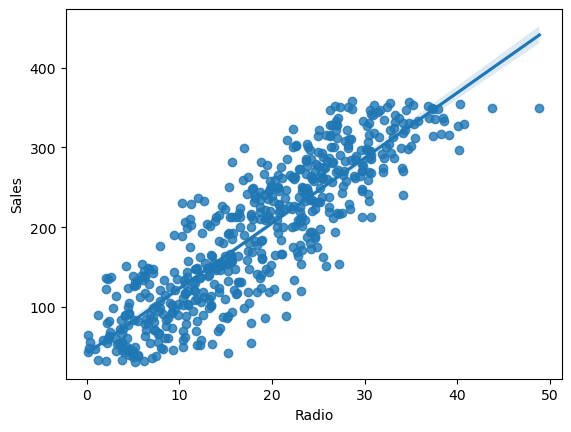

In [62]:
# Plot the OLS data with the best fit regression line
sns.regplot(x= 'Radio', y = 'Sales' ,data=ols_data)

**Question 9: What do you observe from the preceding regression plot?**
The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

**Check the normality assumption.**

In [63]:
residuals= model.resid

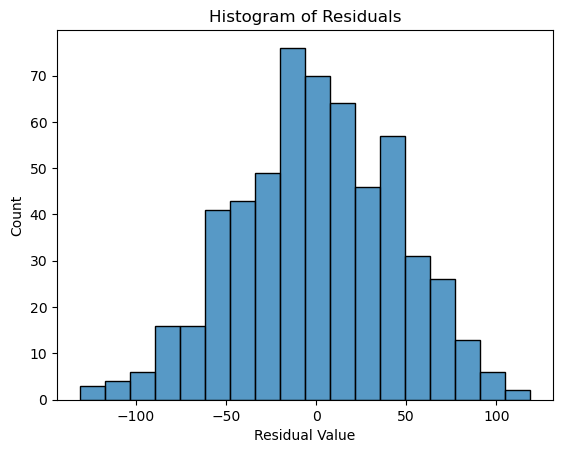

In [64]:
# Visualize the distribution of the residuals in histogram

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

**Question 10: Based on the preceding visualization, what do you observe about the distribution of the residuals?**
Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

**Create a Q-Q plot to confirm the assumption of normality.**

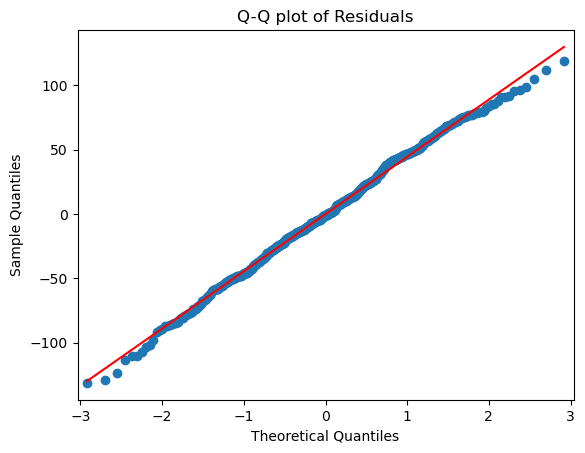

In [66]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

**Question 11: Is the assumption of normality met?**
In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

**Check the assumptions of independent observation and homoscedasticity.**

In [67]:
# Get fitted values
fitted_values = model.predict(ols_data["Radio"])

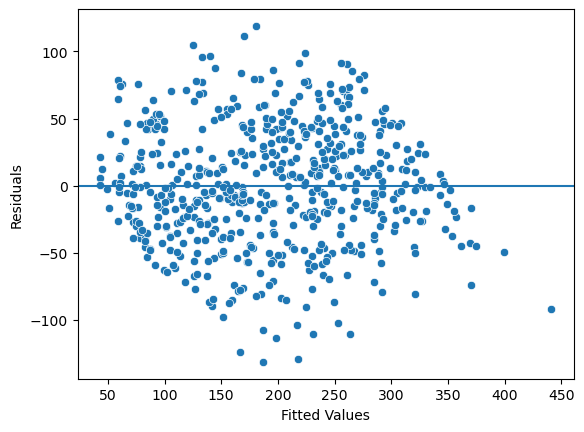

In [70]:
# Create a scatterplot of residuals against fitted values
fig = sns.scatterplot(x=fitted_values, y =residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

**Question 12: Are the assumptions of independent observation and homoscedasticity met?**
In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

**Conclusion**
**What are the key takeaways from this lab?**

Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
The results of a linear regression model can be used to express the relationship between two variables.
**What results can be presented from this lab?**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average. Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

**How would you frame your findings to external stakeholders?**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.

# Evaluate simple linear regression

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

In [72]:
# Load the data.
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


In [73]:
data.describe()

,TV,Radio,Social_Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [74]:
data.shape

(4572, 4)

**Question: What are some reasons for conducting an EDA before constructing a simple linear regression model?**

Understanding which variables are present in the data
Reviewing the distribution of features, such as minimum, mean, and maximum values
Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X
Identifying issues with the data, such as incorrect values (e.g., typos) or missing values

In [75]:
# Explore independant variables
data[['TV','Radio','Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


**Explore the dependent variable**
Before fitting the model, ensure the Sales for each promotion (i.e., row) is present. If the Sales in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the Sales column in the DataFrame data.

In [79]:

# Calculate the average missing rate in the sales column.
missing_sales_data = data['Sales'].isna().mean()
missing_sales_data = round(missing_sales_data * 100 , 2)

# Display the results (missing_sales_data must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales_data) + '%')

Percentage of promotions missing Sales: 0.13%


In [80]:
#Remove all rows in the data from which Sales is missing.
data = data.dropna(subset = ['Sales'], axis=0)

**Visualize the sales distribution**

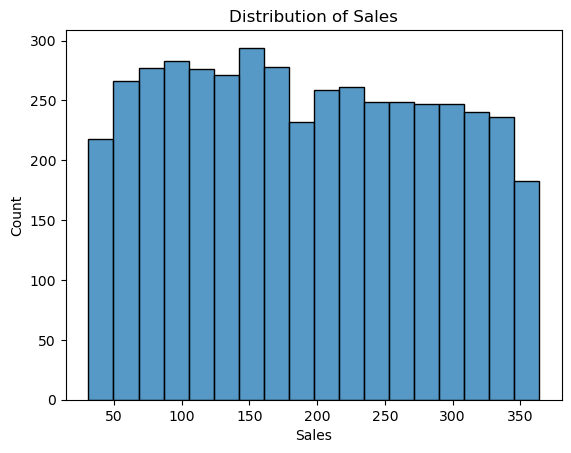

In [82]:
# Create a histogram of the Sales.
fig = sns.histplot(data['Sales'])
fig.set_title('Distribution of Sales')
plt.show()

**Question: What do you observe about the distribution of Sales from the preceding histogram?**

Generally, Sales are equally distributed between 25 and 350 million.

**Model building**
Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with Sales. This will help you select the X variable for the simple linear regression.

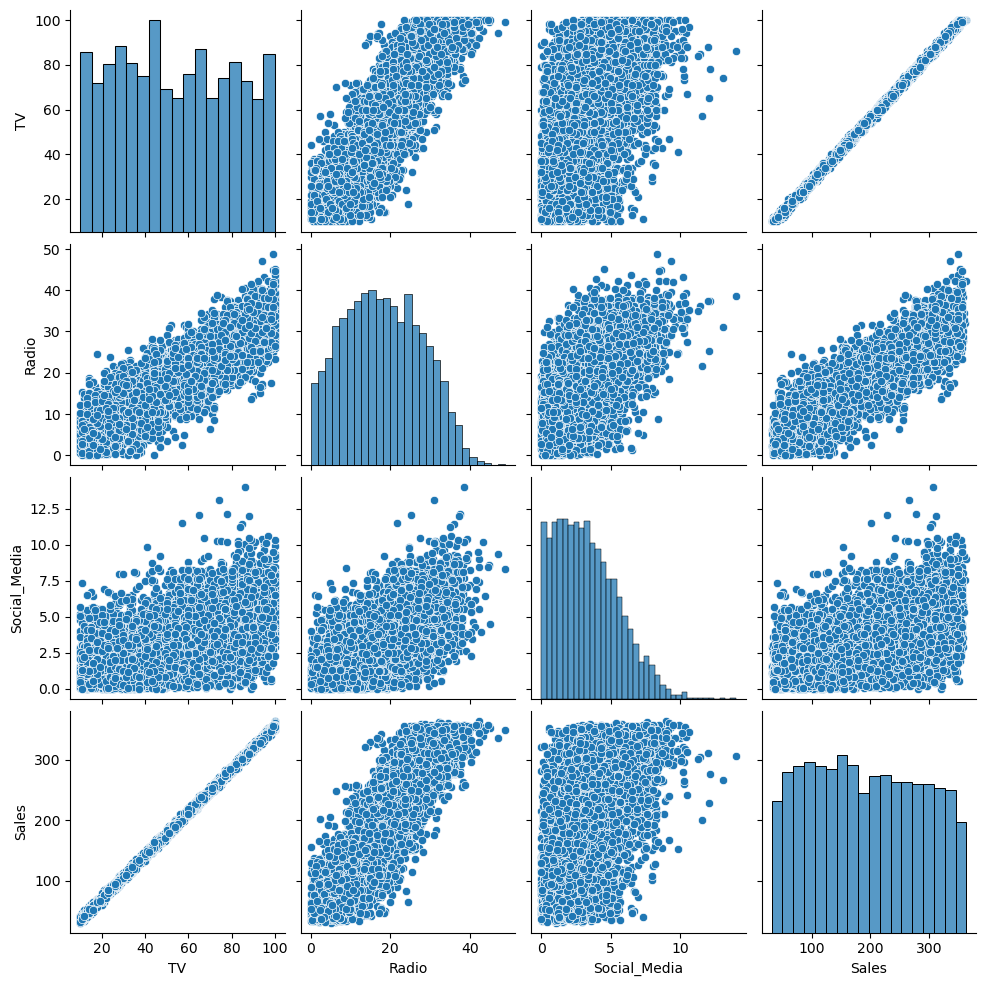

In [83]:
sns.pairplot(data)

**Question: Which variable did you select for X? Why?**

TV clearly has the strongest linear relationship with Sales. You could draw a straight line through the scatterplot of TV and Sales that confidently estimates Sales using TV. Radio and Sales appear to have a linear relationship, but there is larger variance than between TV and Sales.

**Build and fit the model**

In [85]:
# Define the OLS formula.
ols_formula = 'Sales ~ TV'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 11 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:54:30   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Check model assumptions**
To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

Linearity
Independent Observations
Normality
Homoscedasticity

**Model assumption: Linearity**
The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable.

<Axes: xlabel='TV', ylabel='Sales'>

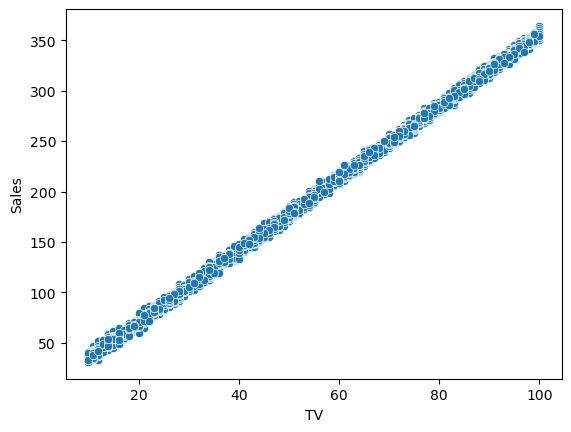

In [86]:
# Create a scatterplot comparing X (TV) and Sales (Y).
sns.scatterplot(x= data['TV'] , y = data['Sales'])

**QUESTION: Is the linearity assumption met?**

There is a clear linear relationship between TV and Sales, meeting the linearity assumption.

**Model assumption: Independence**
The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

**Model assumption: Normality**
The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

**Plot 1:** Histogram of the residuals
**Plot 2:** Q-Q plot of the residuals

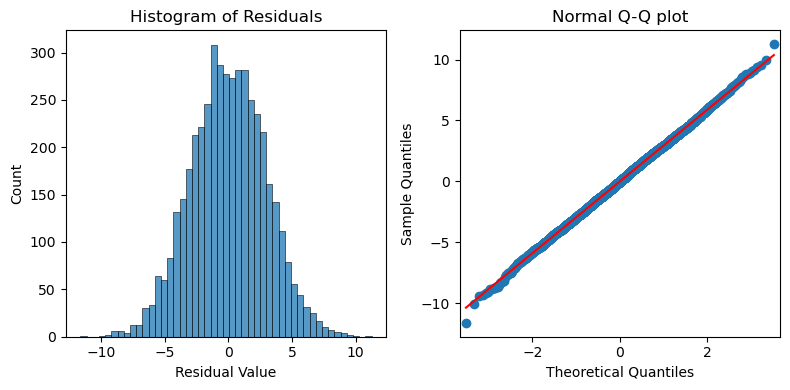

In [94]:
# Calculate the residuals.
residuals = model.resid

# create 1 * 2 plot figure
fig,axes = plt.subplots(1,2, figsize =(8,4))

# Create a histogram with the residuals .
sns.histplot(residuals, ax= axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s', ax= axes[1])
axes[1].set_title("Normal Q-Q plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

plt.show()

**Question: Is the normality assumption met?**

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.

**Model assumption: Homoscedasticity**
The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at 
 to visualize the variance of residuals above and below 
.

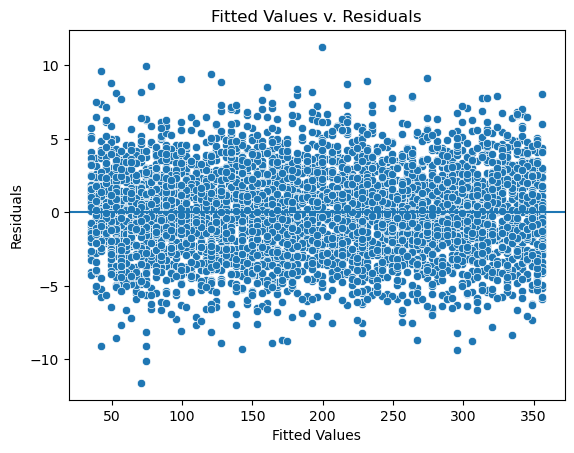

In [95]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

**QUESTION: Is the homoscedasticity assumption met?**

The variance of the residuals is consistant across all 
. Thus, the assumption of homoscedasticity is met.

In [96]:
# Display the model_results defined previously.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 11 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:54:30   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X). What is your intepretation of the model's R-squared?**

Using TV as X results in a simple linear regression model with 
R^2 = 0.9999. In other words, TV explains 99.9%
 of the variation in Sales.

The R-squared value will depend on the variable selected for X.

**Question: Based on the preceding model results, what do you observe about the coefficients?**

When TV is used as the independent variable X, the coefficient for the Intercept is -0.1263 and the coefficient for TV is 3.5614.

**Question: How would you write the relationship between X and Sales in the form of a linear equation?**

When TV is used as the independent variable X, the linear equation is:


Sales(in millions) = -0.1263 + 3.5614 * TV (in millions)

**Question: Based on this model, what is your interpretation of the relationship between X and Sales?**

According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.

**Question: Why is it important to interpret the beta coefficients?**

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

**Question: Based on this model, what is your interpretation of the p-value and confidence interval for the coefficient estimate of X?**

When TV is used as the independent variable, it has a p-value of 0.000 and 95% confidence interval of [3.558, 3.565]. This means there is a 95% chance the interval [3.558, 3.565] contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

**Question: Based on this model, what are you interested in exploring?**

Providing the business with the estimated sales given different TV promotional budgets
Using both TV and Radio as independent variables
Adding plots to help convey the results, such as using the seaborn regplot() to plot the data with a best fit regression line
**Question: What recommendations would you make to the leadership at your organization?**

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales.

**What are some key takeaways that you learned from this lab?**

Exploratory data analysis can be used to find a suitable X variable for a simple linear regression model.
It's important to check that simple linear regression assumptions are met before interpreting model results.
R-squared is a useful measure of prediction error.
It's important to provide measures of uncertainty (e.g., p-values, confidence intervals) with any coefficient estimates.
**What findings would you share with others?**

Sales is relatively equally distributed between $25 and $350 million across all promotions.
In the data visualization, TV has the strongest linear relationship with sales. Radio and sales appear to have a moderate linear relationship, but there is larger variance than between TV and sales. Social media and sales appear to have a weak linear relationship.
When TV is used as the independent variable, the R-squared for the simple linear regression model estimating sales is 0.999.
When TV is used as the independent variable, the coefficient for the intercept is -0.1263 and the coefficient for TV is 3.5614.
When TV is used as the independent variable, the slope of the coefficient for TV has a p-value of 0.000 and a 95% confidence interval of [3.558, 3.565].
**How would you frame your findings to stakeholders?**

Among TV, social media, and radio, TV had the strongest positive linear relationship with sales.
The linear regression model estimates that 99.9% of the variation in sales is explained by the TV promotional budget. In other words, nearly all of the variation in sales can be explained by the TV promotional budget alone, making TV an excellent predictor of sales.
According to the model, when TV is used as the independent variable X, an increase of one million dollars for the TV promotional budget would result in an estimated 3.5614 million more dollars in sales.
The interval (3.558 million, 3.565 million) has a 95% probability of containing the true estimate of the increase in sales for a one million dollar increase in the TV promotional budget. Therefore, the estimate provided in the previous bullet is very confident.